# ResNet Ablation Study

## - 목차
1. ResNet 구현
2. Plain Network 만들기
3. 데이터셋 준비
4. ResNet과 Plain 모델 성능 비교

- 프로젝트 정리

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds

In [2]:
#Tensorflow가 활용할 GPU가 장착되어 있는지 확인
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## 1. ResNet 구현

![resnet structure](https://github.com/YOOHYOJEONG/AIFFEL_LMS_project/blob/master/gd02/images/resnet_sturcture.JPG?raw=true)

### 1.1 ResNet 기본 블록 구성하기
- ResNet-34와 ResNet-50은 모두 conv block이라고 불리는 블록 구조를 각각 3, 4, 6, 3개씩 반복해서 쌓은 형태라는 공통점을 가지고 있음.
- ResNet-34의 경우 Block은 3x3 kernel인 Convolution layer로만 구성되어있지만, ResNet-50은 1x1 Convolution이 앞뒤로 붙어 더 많은 레이어를 한 블록 내에 가짐.

In [26]:
def build_resnet_block(input_layer,
                      num_cnn = 3,
                      channel = 64,
                      block_num = 1,
                      is_50 = False) :
    #입력 레이어
    x = input_layer
    
    #ResNet-34
    if is_50 is False :
        for cnn_num in range(num_cnn):

            if (cnn_num==0):
                if (block_num != 0):
                    x = keras.layers.MaxPooling2D((3, 3), strides=2, padding='same')(x)
                x = keras.layers.Conv2D(
                    filters=channel,
                    kernel_size=(3,3),
                    kernel_initializer='he_normal',
                    padding='same',
                    name=f'stage_{block_num+2}_{cnn_num+1}_conv1'
                )(x)
                x = keras.layers.BatchNormalization(name=f"stage_{block_num+2}_bn{cnn_num+1}_1")(x)
                x = keras.layers.Activation('relu')(x)

                x = keras.layers.Conv2D(
                    filters=channel,
                    kernel_size=(3,3),
                    kernel_initializer='he_normal',
                    padding='same',
                    name=f'stage_{block_num+2}_{cnn_num+1}_conv2'
                )(x)
                x = keras.layers.BatchNormalization(name=f"stage_{block_num+2}_bn{cnn_num+1}_2")(x)
                x = keras.layers.Activation(activation='relu')(x)

            else:
                x = keras.layers.Conv2D(
                    filters=channel,
                    kernel_size=(3,3),
                    kernel_initializer='he_normal',
                    padding='same',
                    name=f'stage_{block_num+2}_{cnn_num+1}_conv1'
                )(x)
                x = keras.layers.BatchNormalization(name=f"stage_{block_num+2}_bn{cnn_num+1}_1")(x)
                x = keras.layers.Activation('relu')(x)

                x = keras.layers.Conv2D(
                    filters=channel,
                    kernel_size=(3,3),
                    kernel_initializer='he_normal',
                    padding='same',
                    name=f'stage_{block_num+2}_{cnn_num+1}_conv2'
                )(x)
                x = keras.layers.BatchNormalization(name=f"stage_{block_num+2}_bn{cnn_num+1}_2")(x)
                x = keras.layers.Activation('relu')(x)
                
    
    #Resnet-50
    else :
        for cnn_num in range(num_cnn):
        
            if (cnn_num==0):
                if (block_num != 0):
                    x = keras.layers.MaxPooling2D((3, 3), strides=2, padding='same')(x)
                x = keras.layers.Conv2D(
                    filters=channel[0],
                    kernel_size=(1,1),
                    kernel_initializer='he_normal',
                    padding='same',
                    name=f'stage_{block_num+2}_{cnn_num+1}_conv1'
                )(x)
                x = keras.layers.BatchNormalization(name=f"stage_{block_num+2}_bn{cnn_num+1}_1")(x)
                x = keras.layers.Activation('relu')(x)

                x = keras.layers.Conv2D(
                    filters=channel[1],
                    kernel_size=(3,3),
                    kernel_initializer='he_normal',
                    padding='same',
                    name=f'stage_{block_num+2}_{cnn_num+1}_conv2'
                )(x)
                x = keras.layers.BatchNormalization(name=f"stage_{block_num+2}_bn{cnn_num+1}_2")(x)
                x = keras.layers.Activation('relu')(x)
                x = keras.layers.Conv2D(
                    filters=channel[2],
                    kernel_size=(3,3),
                    kernel_initializer='he_normal',
                    padding='same',
                    name=f'stage_{block_num+2}_{cnn_num+1}_conv3'
                )(x)
                x = keras.layers.BatchNormalization(name=f"stage_{block_num+2}_bn{cnn_num+1}_3")(x)
                x = keras.layers.Activation(activation='relu')(x)

            else:
                #shortcut=x
                x = keras.layers.Conv2D(
                    filters=channel[0],
                    kernel_size=(1,1),
                    kernel_initializer='he_normal',
                    padding='same',
                    name=f'stage_{block_num+2}_{cnn_num+1}_conv1'
                )(x)
                x = keras.layers.BatchNormalization(name=f"stage_{block_num+2}_bn{cnn_num+1}_1")(x)
                x = keras.layers.Activation('relu')(x)

                x = keras.layers.Conv2D(
                    filters=channel[1],
                    kernel_size=(3,3),
                    kernel_initializer='he_normal',
                    padding='same',
                    name=f'stage_{block_num+2}_{cnn_num+1}_conv2'
                )(x)
                x = keras.layers.BatchNormalization(name=f"stage_{block_num+2}_bn{cnn_num+1}_2")(x)
                x = keras.layers.Activation('relu')(x)
                x = keras.layers.Conv2D(
                    filters=channel[2],
                    kernel_size=(3,3),
                    kernel_initializer='he_normal',
                    padding='same',
                    name=f'stage_{block_num+2}_{cnn_num+1}_conv3'
                )(x)
                x = keras.layers.BatchNormalization(name=f"stage_{block_num+2}_bn{cnn_num+1}_3")(x)
                #x = keras.layers.Add()([x, shortcut])
                x = keras.layers.Activation(activation='relu')(x)
             
            
    return x

In [27]:
def build_resnet(input_shape = (32,32,3),
                num_cnn_list = [3,4,6,3],
                channel_list = [64, 128, 256, 512],
                num_classes = 10,
                is_50 = False,
                ) :
    
    #모델을 만들기 전에 config list들이 같은 길이인지 확인.
    assert len(num_cnn_list) == len(channel_list)
    
    #input layer 생성
    input_layer = keras.layers.Input(shape=input_shape)
    
    output = input_layer
    
    output = output
    output = keras.layers.Conv2D(64, (7,7), kernel_initializer='he_normal', padding='same', strides=2,name="stage1_conv")(output)
    output = keras.layers.BatchNormalization(name="stage1_batchnomalization")(output)
    output = keras.layers.Activation('relu')(output)
    
    if is_50:
        channel_list=[[64,64,256],[128,128,512],[256,256,1024],[512,512,2048]]
        
    #config list 길이만큼 반복해서 블록을 생성.
    for i, (num_cnn, channel) in enumerate(zip(num_cnn_list, channel_list)):
        if i ==0:
            output = keras.layers.MaxPooling2D((3, 3), strides=2, padding='same',name="stage2_0_maxpooling")(output)
        
        output = build_resnet_block(
            output,
            num_cnn=num_cnn, 
            channel=channel,
            block_num=i,
            is_50=is_50
        )
        
    output = keras.layers.AveragePooling2D(padding="same")(output)
    output = keras.layers.Flatten(name='flatten')(output)
    output = keras.layers.Dense(10, activation='relu', name='fc1000')(output)
    #output = keras.layers.Dense(num_classes, activation='softmax', name='predictions')(output)
    
    model = keras.Model(
        inputs=input_layer, 
        outputs=output
    )
    
    return model

### 1.2 ResNet-34

In [28]:
resnet_34 = build_resnet(input_shape=(32,32,3), is_50 = False)
resnet_34.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
stage1_conv (Conv2D)         (None, 16, 16, 64)        9472      
_________________________________________________________________
stage1_batchnomalization (Ba (None, 16, 16, 64)        256       
_________________________________________________________________
activation_395 (Activation)  (None, 16, 16, 64)        0         
_________________________________________________________________
stage2_0_maxpooling (MaxPool (None, 8, 8, 64)          0         
_________________________________________________________________
stage_2_1_conv1 (Conv2D)     (None, 8, 8, 64)          36928     
_________________________________________________________________
stage_2_bn1_1 (BatchNormaliz (None, 8, 8, 64)          256

### 1.3 ResNet-50

In [29]:
resnet_50 = build_resnet(input_shape=(32,32,3), is_50 = True)
resnet_50.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
stage1_conv (Conv2D)         (None, 16, 16, 64)        9472      
_________________________________________________________________
stage1_batchnomalization (Ba (None, 16, 16, 64)        256       
_________________________________________________________________
activation_428 (Activation)  (None, 16, 16, 64)        0         
_________________________________________________________________
stage2_0_maxpooling (MaxPool (None, 8, 8, 64)          0         
_________________________________________________________________
stage_2_1_conv1 (Conv2D)     (None, 8, 8, 64)          4160      
_________________________________________________________________
stage_2_bn1_1 (BatchNormaliz (None, 8, 8, 64)          256

## 2. Plain Network 만들기

In [22]:
#ResNet block에서 shortcut을 제외한 plain block 생성

def build_plainnet_block(input_layer,
                    num_cnn=3, 
                    channel=64,
                    block_num=1,
                    is_50=False
                   ):
    #입력 레이어
    x = input_layer
    
    #Plain-34
    if is_50 is False :
        for cnn_num in range(num_cnn):

            if (cnn_num==0):
                if (block_num != 0):
                    x = keras.layers.MaxPooling2D((3, 3), strides=2, padding='same')(x)
                x = keras.layers.Conv2D(
                    filters=channel,
                    kernel_size=(3,3),
                    kernel_initializer='he_normal',
                    padding='same',
                    name=f'stage_{block_num+2}_{cnn_num+1}_conv1'
                )(x)
                x = keras.layers.BatchNormalization(name=f"stage_{block_num+2}_bn{cnn_num+1}_1")(x)
                x = keras.layers.Activation('relu')(x)

                x = keras.layers.Conv2D(
                    filters=channel,
                    kernel_size=(3,3),
                    kernel_initializer='he_normal',
                    padding='same',
                    name=f'stage_{block_num+2}_{cnn_num+1}_conv2'
                )(x)
                shortcut = keras.layers.Conv2D(
                    filters=channel,
                    kernel_size=(3,3),
                    kernel_initializer='he_normal',
                    padding='same',
                    name=f'stage_{block_num+2}_{cnn_num+1}_conv2'
                )(input_layer)
                x = keras.layers.BatchNormalization(name=f"stage_{block_num+2}_bn{cnn_num+1}_2")(x)
                shortcut=keras.layers.BatchNormalization(name=f"stage_{block_num+2}_shortcut{cnn_num+1}_2")(x)
                x = keras.layers.Add()([x, shortcut])
                x = keras.layers.Activation(activation='relu')(x)

            else:
                shortcut=x
                x = keras.layers.Conv2D(
                    filters=channel,
                    kernel_size=(3,3),
                    kernel_initializer='he_normal',
                    padding='same',
                    name=f'stage_{block_num+2}_{cnn_num+1}_conv1'
                )(x)
                x = keras.layers.BatchNormalization(name=f"stage_{block_num+2}_bn{cnn_num+1}_1")(x)
                x = keras.layers.Activation('relu')(x)

                x = keras.layers.Conv2D(
                    filters=channel,
                    kernel_size=(3,3),
                    kernel_initializer='he_normal',
                    padding='same',
                    name=f'stage_{block_num+2}_{cnn_num+1}_conv2'
                )(x)
                x = keras.layers.BatchNormalization(name=f"stage_{block_num+2}_bn{cnn_num+1}_2")(x)
                x = keras.layers.Add()([x, shortcut])
                x = keras.layers.Activation('relu')(x)
                
    
    #Plain-50
    else :
        for cnn_num in range(num_cnn):
        
            if (cnn_num==0):
                if (block_num != 0):
                    x = keras.layers.MaxPooling2D((3, 3), strides=2, padding='same')(x)
                x = keras.layers.Conv2D(
                    filters=channel[0],
                    kernel_size=(1,1),
                    kernel_initializer='he_normal',
                    padding='same',
                    name=f'stage_{block_num+2}_{cnn_num+1}_conv1'
                )(x)
                x = keras.layers.BatchNormalization(name=f"stage_{block_num+2}_bn{cnn_num+1}_1")(x)
                x = keras.layers.Activation('relu')(x)

                x = keras.layers.Conv2D(
                    filters=channel[1],
                    kernel_size=(3,3),
                    kernel_initializer='he_normal',
                    padding='same',
                    name=f'stage_{block_num+2}_{cnn_num+1}_conv2'
                )(x)
                x = keras.layers.BatchNormalization(name=f"stage_{block_num+2}_bn{cnn_num+1}_2")(x)
                x = keras.layers.Activation('relu')(x)
                x = keras.layers.Conv2D(
                    filters=channel[2],
                    kernel_size=(3,3),
                    kernel_initializer='he_normal',
                    padding='same',
                    name=f'stage_{block_num+2}_{cnn_num+1}_conv3'
                )(x)
                x = keras.layers.BatchNormalization(name=f"stage_{block_num+2}_bn{cnn_num+1}_3")(x)
                
                shortcut = keras.layers.Conv2D(
                    filters=channel[2],
                    kernel_size=(1,1),
                    kernel_initializer='he_normal',
                    padding='same',
                    name=f'stage_{block_num+2}_{cnn_num+1}_conv3'
                )(input_layer)
                shortcut=keras.layers.BatchNormalization(name=f"stage_{block_num+2}_shortcut{cnn_num+1}_2")(x)
                
                x = keras.layers.Add()([x, shortcut])
                x = keras.layers.Activation(activation='relu')(x)

            else:
                shortcut=x
                x = keras.layers.Conv2D(
                    filters=channel[0],
                    kernel_size=(1,1),
                    kernel_initializer='he_normal',
                    padding='same',
                    name=f'stage_{block_num+2}_{cnn_num+1}_conv1'
                )(x)
                x = keras.layers.BatchNormalization(name=f"stage_{block_num+2}_bn{cnn_num+1}_1")(x)
                x = keras.layers.Activation('relu')(x)

                x = keras.layers.Conv2D(
                    filters=channel[1],
                    kernel_size=(3,3),
                    kernel_initializer='he_normal',
                    padding='same',
                    name=f'stage_{block_num+2}_{cnn_num+1}_conv2'
                )(x)
                x = keras.layers.BatchNormalization(name=f"stage_{block_num+2}_bn{cnn_num+1}_2")(x)
                x = keras.layers.Activation('relu')(x)
                x = keras.layers.Conv2D(
                    filters=channel[2],
                    kernel_size=(3,3),
                    kernel_initializer='he_normal',
                    padding='same',
                    name=f'stage_{block_num+2}_{cnn_num+1}_conv3'
                )(x)
                x = keras.layers.BatchNormalization(name=f"stage_{block_num+2}_bn{cnn_num+1}_3")(x)
                x = keras.layers.Add()([x, shortcut])
                x = keras.layers.Activation(activation='relu')(x)
             
            
    return x

In [23]:
def build_plainnet(input_shape = (32,32,3),
                num_cnn_list = [3,4,6,3],
                channel_list = [64, 128, 256, 512],
                num_classes = 10,
                is_50 = False,
                ) :
    
    #모델을 만들기 전에 config list들이 같은 길이인지 확인.
    assert len(num_cnn_list) == len(channel_list)
    
    #input layer 생성
    input_layer = keras.layers.Input(shape=input_shape)
    
    output = input_layer
    
    output = output
    output = keras.layers.Conv2D(64, (7,7), kernel_initializer='he_normal', padding='same', strides=2,name="stage1_conv")(output)
    output = keras.layers.BatchNormalization(name="stage1_batchnomalization")(output)
    output = keras.layers.Activation('relu')(output)
    
    if is_50:
        channel_list=[[64,64,256],[128,128,512],[256,256,1024],[512,512,2048]]
        
    #config list 길이만큼 반복해서 블록을 생성.
    for i, (num_cnn, channel) in enumerate(zip(num_cnn_list, channel_list)):
        if i ==0:
            output = keras.layers.MaxPooling2D((3, 3), strides=2, padding='same',name="stage2_0_maxpooling")(output)
        
        output = build_resnet_block(
            output,
            num_cnn=num_cnn, 
            channel=channel,
            block_num=i,
            is_50=is_50
        )
        
    output = keras.layers.AveragePooling2D(padding="same")(output)
    output = keras.layers.Flatten(name='flatten')(output)
    output = keras.layers.Dense(10, activation='relu', name='fc1000')(output)
    #output = keras.layers.Dense(num_classes, activation='softmax', name='predictions')(output)
    
    model = keras.Model(
        inputs=input_layer, 
        outputs=output
    )
    
    return model

### 2.1 Plain-34

In [24]:
plainnet_34 = build_plainnet(input_shape=(32, 32,3), is_50=False)

plainnet_34.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
stage1_conv (Conv2D)            (None, 16, 16, 64)   9472        input_10[0][0]                   
__________________________________________________________________________________________________
stage1_batchnomalization (Batch (None, 16, 16, 64)   256         stage1_conv[0][0]                
__________________________________________________________________________________________________
activation_313 (Activation)     (None, 16, 16, 64)   0           stage1_batchnomalization[0][0]   
____________________________________________________________________________________________

### 2.2 Plain-50

In [25]:
plainnet_50 = build_plainnet(input_shape=(32, 32,3), is_50=True)

plainnet_50.summary()

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
stage1_conv (Conv2D)            (None, 16, 16, 64)   9472        input_11[0][0]                   
__________________________________________________________________________________________________
stage1_batchnomalization (Batch (None, 16, 16, 64)   256         stage1_conv[0][0]                
__________________________________________________________________________________________________
activation_346 (Activation)     (None, 16, 16, 64)   0           stage1_batchnomalization[0][0]   
____________________________________________________________________________________________

## 3. 데이터셋 준비
- tensorflow-datasets에서 제공하는 cats_vs_dogs 데이터셋 로드

In [30]:
import urllib3
import os
urllib3.disable_warnings()

#데이터셋 다운로드과정의 프로그레스바 없애는 코드
#tfds.disable_progress_bar()   

(ds_train, ds_test), ds_info = tfds.load(
    'cats_vs_dogs',
    data_dir = os.getenv('HOME')+'/aiffel/cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    shuffle_files=True,
    as_supervised = True,
    with_info=True,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling cats_vs_dogs-train.tfrecord...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Dataset cats_vs_dogs downloaded and prepared to /aiffel/aiffel/cats_vs_dogs/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [31]:
#Tensorflow 데이터셋 feature 정보 확인 
print(ds_info.features)

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'image/filename': Text(shape=(), dtype=tf.string),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
})


In [32]:
#데이터의 개수 확인 
print(tf.data.experimental.cardinality(ds_train))
print(tf.data.experimental.cardinality(ds_test))

tf.Tensor(18610, shape=(), dtype=int64)
tf.Tensor(4652, shape=(), dtype=int64)


In [33]:
print(ds_info.features["label"].num_classes)
print(ds_info.features["label"].names)

2
['cat', 'dog']


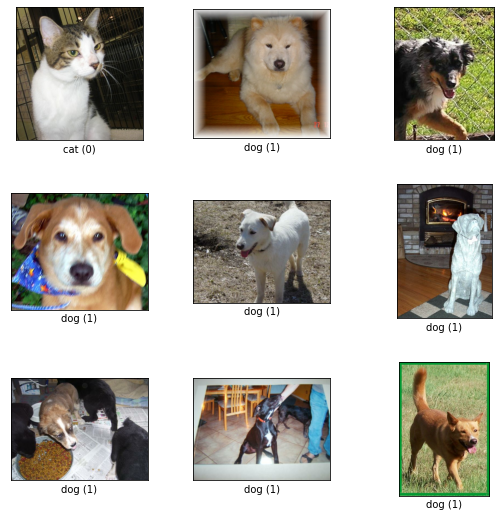

In [34]:
fig = tfds.show_examples(ds_train, ds_info)

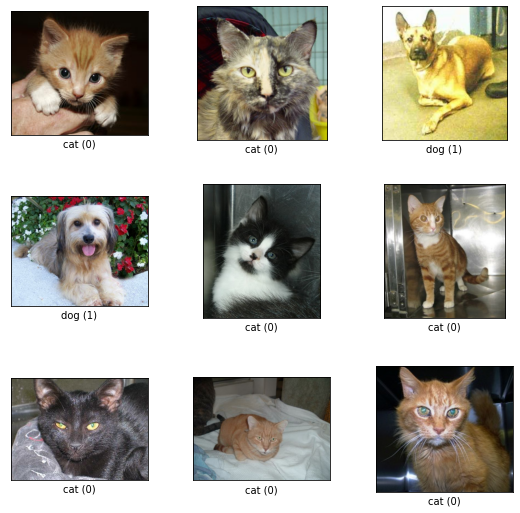

In [35]:
fig = tfds.show_examples(ds_test, ds_info)

In [37]:
#정규화 함수
def normalize_and_resize_img(image, label):
    """Normalizes images: `uint8` -> `float32`."""
    image = tf.image.resize(image, [32, 32])   #OOM 에러로 인해 이미지 사이즈를 줄임.
    image = tf.cast(image, tf.float32) / 255 
    
    return image, label

In [38]:
#정규화 적용 함수
def apply_normalize_on_dataset(ds, is_test=False, batch_size=16):
    ds = ds.map(
        normalize_and_resize_img, 
        num_parallel_calls=1
    )
    ds = ds.batch(batch_size)
    if not is_test:
        ds = ds.repeat()
        ds = ds.shuffle(200)
    #ds = ds.prefetch(tf.data.experimental.AUTOTUNE)
    
    return ds

## 4. ResNet과 Plain 모델 성능 비교

In [39]:
BATCH_SIZE = 32
EPOCH = 10

ds_train = apply_normalize_on_dataset(ds_train, batch_size=BATCH_SIZE)
ds_test = apply_normalize_on_dataset(ds_test, batch_size=BATCH_SIZE)

### 4.1 ResNet-34 VS Plain-34

In [44]:
#ResNet-34 학습
resnet_34.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01, clipnorm=1.),
    metrics=['accuracy'],
)

history_resnet_34 = resnet_34.fit(
    ds_train,
    steps_per_epoch=int(18610/BATCH_SIZE),
    validation_steps=int(2326/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/10
581/581 [==============================] - 90s 125ms/step - loss: 1.2912 - accuracy: 0.4724 - val_loss: 0.6961 - val_accuracy: 0.4961
Epoch 2/10
581/581 [==============================] - 58s 99ms/step - loss: 0.7062 - accuracy: 0.4992 - val_loss: 0.6942 - val_accuracy: 0.4805
Epoch 3/10
581/581 [==============================] - 58s 100ms/step - loss: 0.6935 - accuracy: 0.4952 - val_loss: 0.6934 - val_accuracy: 0.5082
Epoch 4/10
581/581 [==============================] - 58s 100ms/step - loss: 0.6932 - accuracy: 0.4960 - val_loss: 0.6932 - val_accuracy: 0.5109
Epoch 5/10
581/581 [==============================] - 58s 99ms/step - loss: 0.6932 - accuracy: 0.5064 - val_loss: 0.6935 - val_accuracy: 0.5210
Epoch 6/10
581/581 [==============================] - 58s 100ms/step - loss: 0.6932 - accuracy: 0.5050 - val_loss: 0.6930 - val_accuracy: 0.4913
Epoch 7/10
581/581 [==============================] - 58s 100ms/step - loss: 0.6944 - accuracy: 0.5039 - val_loss: 0.6934 - val_accu

In [45]:
#Plain-34 학습
plainnet_34.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01, clipnorm=1.),
    metrics=['accuracy'],
)

history_plainnet_34 = plainnet_34.fit(
    ds_train,
    steps_per_epoch=int(18610/BATCH_SIZE),
    validation_steps=int(2326/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/10
581/581 [==============================] - 68s 104ms/step - loss: 5.3793 - accuracy: 0.3883 - val_loss: 2.3434 - val_accuracy: 0.4768
Epoch 2/10
581/581 [==============================] - 60s 102ms/step - loss: 2.3240 - accuracy: 0.5037 - val_loss: 2.3074 - val_accuracy: 0.4731
Epoch 3/10
581/581 [==============================] - 60s 103ms/step - loss: 2.3059 - accuracy: 0.5049 - val_loss: 2.3081 - val_accuracy: 0.4939
Epoch 4/10
581/581 [==============================] - 60s 103ms/step - loss: 2.3064 - accuracy: 0.4991 - val_loss: 2.3081 - val_accuracy: 0.4943
Epoch 5/10
581/581 [==============================] - 60s 102ms/step - loss: 2.3038 - accuracy: 0.5023 - val_loss: 2.3026 - val_accuracy: 0.4970
Epoch 6/10
581/581 [==============================] - 60s 103ms/step - loss: 2.3026 - accuracy: 0.5001 - val_loss: 2.3026 - val_accuracy: 0.4838
Epoch 7/10
581/581 [==============================] - 60s 103ms/step - loss: 2.3032 - accuracy: 0.5023 - val_loss: 2.3074 - val_ac

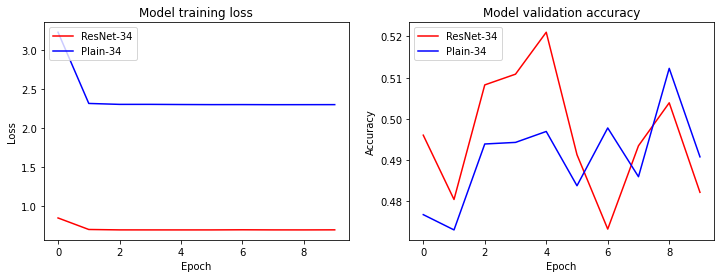

In [46]:
#ResNet-34 VS Plain-34 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_resnet_34.history['loss'], 'r')
plt.plot(history_plainnet_34.history['loss'], 'b')
plt.title('Model training loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['ResNet-34', 'Plain-34'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_resnet_34.history['val_accuracy'], 'r')
plt.plot(history_plainnet_34.history['val_accuracy'], 'b')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['ResNet-34', 'Plain-34'], loc='upper left')

plt.show()

### 4.1 ResNet-50 VS Plain-50

In [47]:
#ResNet-50 학습
resnet_50.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01, clipnorm=1.),
    metrics=['accuracy'],
)

history_resnet_50 = resnet_50.fit(
    ds_train,
    steps_per_epoch=int(18610/BATCH_SIZE),
    validation_steps=int(2326/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/10
581/581 [==============================] - 164s 240ms/step - loss: 1.2416 - accuracy: 0.4761 - val_loss: 0.6947 - val_accuracy: 0.5009
Epoch 2/10
581/581 [==============================] - 122s 211ms/step - loss: 0.6931 - accuracy: 0.4969 - val_loss: 0.6933 - val_accuracy: 0.5056
Epoch 3/10
581/581 [==============================] - 122s 211ms/step - loss: 0.6932 - accuracy: 0.5053 - val_loss: 0.6932 - val_accuracy: 0.5135
Epoch 4/10
581/581 [==============================] - 122s 210ms/step - loss: 0.6932 - accuracy: 0.5043 - val_loss: 0.6930 - val_accuracy: 0.5169
Epoch 5/10
581/581 [==============================] - 122s 211ms/step - loss: 0.6932 - accuracy: 0.4970 - val_loss: 0.6931 - val_accuracy: 0.5048
Epoch 6/10
581/581 [==============================] - 122s 210ms/step - loss: 0.6934 - accuracy: 0.5007 - val_loss: 0.6932 - val_accuracy: 0.4991
Epoch 7/10
581/581 [==============================] - 129s 222ms/step - loss: 0.6932 - accuracy: 0.5069 - val_loss: 0.6931 -

In [48]:
#Plain-50 학습
plainnet_50.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01, clipnorm=1.),
    metrics=['accuracy'],
)

history_plainnet_50 = plainnet_50.fit(
    ds_train,
    steps_per_epoch=int(18610/BATCH_SIZE),
    validation_steps=int(2326/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/10
581/581 [==============================] - 137s 218ms/step - loss: 2.0521 - accuracy: 0.4558 - val_loss: 1.2652 - val_accuracy: 0.5100
Epoch 2/10
581/581 [==============================] - 125s 215ms/step - loss: 2.1187 - accuracy: 0.5108 - val_loss: 2.3191 - val_accuracy: 0.4744
Epoch 3/10
581/581 [==============================] - 125s 216ms/step - loss: 2.3061 - accuracy: 0.4999 - val_loss: 2.3082 - val_accuracy: 0.4844
Epoch 4/10
581/581 [==============================] - 125s 216ms/step - loss: 2.3041 - accuracy: 0.5089 - val_loss: 2.3174 - val_accuracy: 0.4891
Epoch 5/10
581/581 [==============================] - 125s 216ms/step - loss: 2.3038 - accuracy: 0.5020 - val_loss: 2.3016 - val_accuracy: 0.4861
Epoch 6/10
581/581 [==============================] - 125s 215ms/step - loss: 2.3026 - accuracy: 0.4929 - val_loss: 2.3016 - val_accuracy: 0.4803
Epoch 7/10
581/581 [==============================] - 125s 215ms/step - loss: 2.3040 - accuracy: 0.4987 - val_loss: 2.3114 -

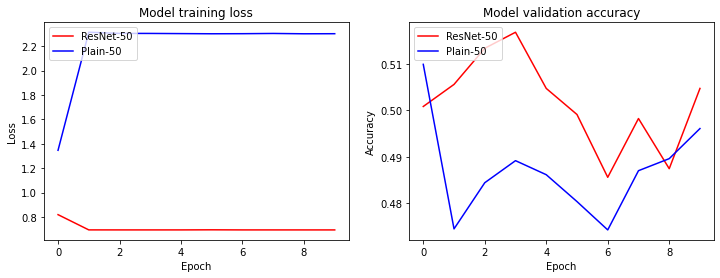

In [52]:
#ResNet-50 VS Plain-50 시각화

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_resnet_50.history['loss'], 'r')
plt.plot(history_plainnet_50.history['loss'], 'b')
plt.title('Model training loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['ResNet-50', 'Plain-50'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_resnet_50.history['val_accuracy'], 'r')
plt.plot(history_plainnet_50.history['val_accuracy'], 'b')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['ResNet-50', 'Plain-50'], loc='upper left')

plt.show()

---

## - 프로젝트 정리

1. OOM 메모리 오류: 프로젝트를 진행하면서 OOM을 에러를 자주 마주했었다. 모델을 돌리고 셧다운 후 다시 돌리는 수고를 하지 않기 위해서 이미지 사이즈를 줄였으며, 배치 사이즈를 32로 줄이고, 10에폭만 학습을 진행하였더니 무리없이 진행할 수 있었다.   
2. Loss 감소 : ResNet-34와 Plain-34을 비교하면 둘 다 loss가 수렴하는 것을 볼 수 있지만, 확실히 shortcut이 없는 Plain의 loss가 훨씬 높은 걸 볼 수 있다. ResNet-50과 Plain-50을 비교했을 때, ResNet-50은 안정적으로 loss가 수렴하는 반면 Plain-50은 오히려 loss가 증가했다. Plain-50의 경우 학습이 제대로 진행되지 않은 것 같다고 판단했다. 34-layer와 50-layer 모두 비교해도 ResNet이 Plain보다 성능이 좋다는 것을 알 수 있다.   
3. Validation Accuracy : ResNet-34와 Plain-34를 비교하면 둘 다 accuracy가 올랐다 내렸다 하며 안정적이지 못한 결과가 나와 그래프만 보고선 뭐가 더 좋다고 판단하기가 어렵다. ResNet-50과 Plain-50을 비교하면 ResNet-50이 훨씬 높은 Accuracy를 보이고 있으며 Palin-50보다 ResNet-50의 성능이 더 좋다는 것을 알 수 있다.    
|  | ResNet | Plain |   
| :--: | :--: | :--: |   
| 34 | 0.496 | 0.441 |   
| 50 | 0.501  | 0.487 |     
- Accuracy를 위와 같이 표로 비교하면 확실히 34-layers보다 50-layers가 성능이 조금 더 좋다는 것을 알 수 있다. 또 ResNet이 Plain보다 조금 더 높은 accuracy를 보이는 것으로 보아 ResNet의 성능이 Plain 보다 더 좋다는 것도 알 수 있다.   

(정리)   
OOM 에러로 인해 이미지 사이즈도 줄이고 배치 사이즈도 줄였는데 학습 시간이 생각보다 오래 걸려 10에폭으로만 시도한 것이 아쉬웠다. 좀 더 많은 에폭으로 학습을 진행했다면 각각의 차이가 좀 더 뚜렷하게 시각화되었을 것 같다. 또 이미지 사이즈를 줄이지 않고 원본 사이즈 그대로 진행했다면 학습이 제대로 되지 않은 모델 없이 전부 잘 학습이 진행되었을까 생각이 들기도 했다.    
그럼에도 불구하고 ResNet과 Plain의 차이는 비교할 수 있었고 ResNet의 성능이 더 좋다는 것도 알 수 있었다. 